## 2. Unsupervised Learning in the Ising Model
In this problem you will use principal component analysis (PCA) to identify phases in the Ising
model without any explicit labels. You will reproduce Figures 1 and 2 of L. Wang, Phys. Rev. B 94,
195105 (2016), https://arxiv.org/abs/1606.00318.

As in problem 1, the data is stored in an $M\times N$ matrix $X$, where each of the $M$ rows stores a spin configuration (a set of integers $\pm1$ corresponding to up/down) for a system with $N = L^2$ spins. The data files corresponding to $L = 20, 40, 80$ are included in the data directory of the course repository as compressed files: Ising2D_config_LZ.dat.gz where $Z=20,40,80$.

Each file contains 100 spin configurations at each of the 20 temperatures $T/ J = 1.0, 1.1, 1.2, . . . , 2.9$ such that $M = 2000$ for each lattice size.

For each $L$, there is a corresponding file storing the temperature at which the configuration was generated named Ising2D_temps_LZ.dat where $Z = 20,40,80$.

(a) Read in the spin configurations for the Ising model for each lattice size and determines the principal components $\mathbf{v}_j$. Make a scatter plot of the first two projected principal components $\mathbf{x'}_1=\mathbf{X}\mathbf{v}_1$ vs. $\mathbf{x'}_2=\mathbf{X}\mathbf{v}_2$ for each lattice size. Do you observe any trends as L is increased?

(b) Label the points in your plot such that they are coloured according to their temperature and
compare with Figure 2 of the Wang reference. Can you distinguish between the phases of the
2D Ising model?

(c) Consider now the explained variance ratios

$r_l=\frac{\lambda_l}{\sum_{i=1}^N \lambda_i}$

Plot the largest 10 values of $r_l$ for each lattice size and compare with Figure 1 of the reference.
How many principal components are needed to explain how the Ising spin configurations vary
as a function of temperature?


In [1]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
import ml4s
import scipy.linalg
from sklearn.decomposition import PCA
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s._set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
x={}
Tval={}
λ={}
PCAj={}
V={}
pX={}
XPCA={}

x['20'] = np.loadtxt('data/Ising2D_config_L20.dat.gz')
Tval['20'] = np.loadtxt('data/Ising2D_temps_L20.dat')
x['40'] = np.loadtxt('data/Ising2D_config_L40.dat.gz')
Tval['40'] = np.loadtxt('data/Ising2D_temps_L40.dat')
x['80'] = np.loadtxt('data/Ising2D_config_L80.dat.gz')
Tval['80'] = np.loadtxt('data/Ising2D_temps_L80.dat')

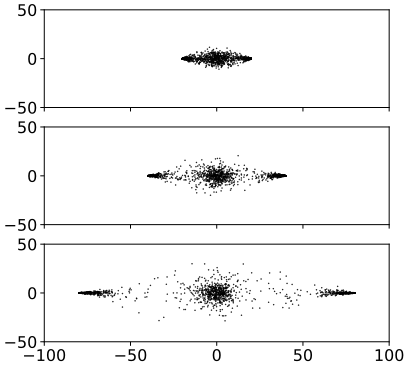

In [6]:
fig,ax = plt.subplots(3,1, sharex=True, figsize=(6,6))
model = PCA(n_components=2)
ax[0].set_xlim(-100,100)
ax[0].set_ylim(-50,50)
ax[1].set_xlim(-100,100)
ax[1].set_ylim(-50,50)
ax[2].set_xlim(-100,100)
ax[2].set_ylim(-50,50)


for  i, config in zip(range(len(x)), x):
    # perform the PCA
    XPCA[config] = model.fit_transform(x[config])

    # store the results
    λ[config] = model.explained_variance_
    PCAj[config] = model.explained_variance_ratio_
    V[config] = model.components_

    # project onto the first 2 principal components
    pX[config] = x[config] @ V[config].T
    
    #plotting
    ax[i].plot(pX[config][:,0],pX[config][:,1],'k.',markersize=1)

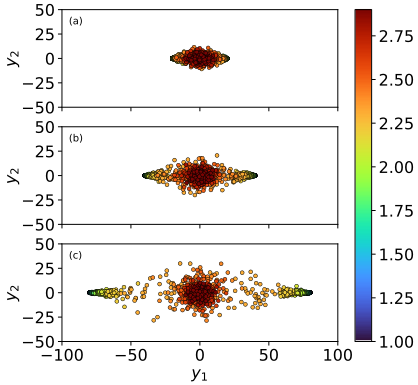

In [59]:
fig,ax = plt.subplots(3,1, sharex=True, figsize=(6,6))
for i in range(3):
    plt.sca(ax[i])
    plt.yticks(np.arange(-50,51,step=25))

ax[0].set_xlim(-100,100)
ax[0].set_ylim(-50,50)
ax[0].set_ylabel('$y_2$')
ax[0].text(-95,35,'(a)')
ax[1].set_xlim(-100,100)
ax[1].set_ylim(-50,50)
ax[1].set_ylabel('$y_2$')
ax[1].text(-95,35,'(b)')
ax[2].set_xlim(-100,100)
ax[2].set_ylim(-50,50)
ax[2].set_xlabel('$y_1$')
ax[2].set_ylabel('$y_2$')
ax[2].text(-95,35,'(c)')

for  i, config in zip(range(len(x)), x):
    #plotting
    im=ax[i].scatter(pX[config][:,0],pX[config][:,1],c=Tval[config],cmap='turbo',s=15,edgecolor='k',linewidth=0.5)

c_bar = fig.colorbar(im, ax=ax.ravel().tolist(), shrink=1)

([<matplotlib.axis.XTick at 0x2a63b3fbe20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

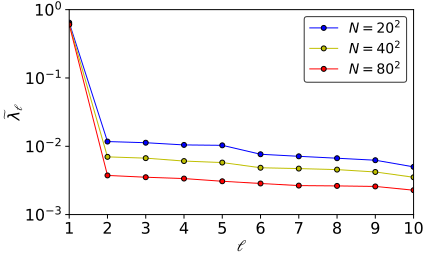

In [96]:
aR=np.arange(1,11)
color=['b','y','r']

model = PCA(n_components=10)

for  i, config in zip(range(len(x)), x):
    # perform the PCA
    XPCA[config] = model.fit_transform(x[config])
    PCAj[config] = model.explained_variance_ratio_

    #plotting
    plt.semilogy(aR,PCAj[config],'%so-' %color[i],label='$N=%s^2$' % config,markersize=5, markeredgecolor='k',markeredgewidth=1,linewidth=1 )

plt.legend(frameon=True,loc='best',edgecolor='k')
plt.xlabel('$\mathcal{\ell}$')
plt.ylabel('$\widetilde{\lambda}_{\mathcal{\ell}}$')
plt.ylim(0.001,1.0000)
plt.xlim(1,10)
plt.xticks(np.arange(1,11,step=1))

### Comments:
From this chart, it can be seen that one can use 2 principle components to explain how the Ising spin configurations vary as a function of temperature. However, if available resources are not an issue to the user, then the model can explained with a large number of principle components. From this set of data, I would either chose 2, 6, or 10 principle components based on the behavior of the model at $N=20^2$.